In [0]:
import math
import glob, os, operator, re
import string
from collections import Counter
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [0]:
def preprocess(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[\n]+',' ',text)
    # remove special characters
    text = re.sub(r'[\u4e00-\u9fff«–\u200b”„“ˈ"—\ufeff]+',' ', text)
    # lowercase and tokenisation by white space
    text = text.lower().split()
    return text

pp_corpora = []
train_test_corpora = []
directory_list = os.listdir("./exercise5_corpora")

for file in directory_list:
    filename = "./exercise5_corpora/" + str(file)
    with open(filename, "rt", encoding="utf-8") as infile:
        text = infile.read()
        pp = preprocess(text)
        train = pp[0: int((len(pp)*4)/5)]
        test = pp[int((len(pp)*4)/5):len(pp)]
#         train, test = train_test_split(pp, test_size = 0.2)
        train_test_corpora.append((train,test))
    infile.close()

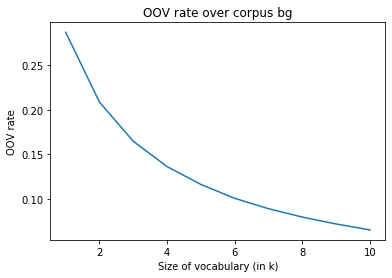

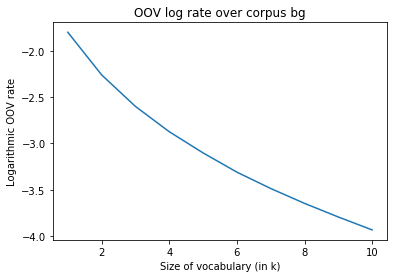

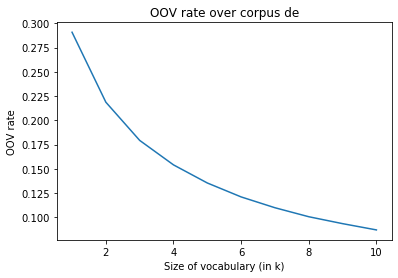

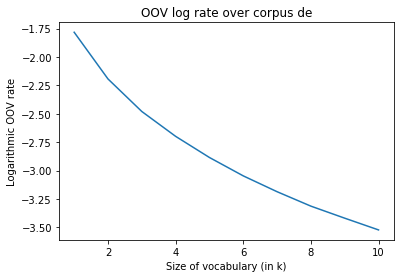

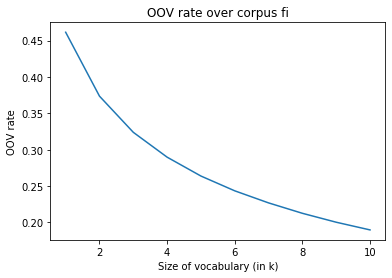

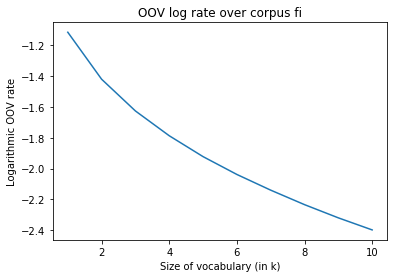

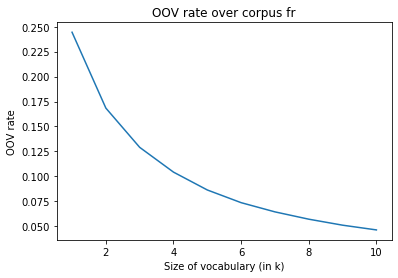

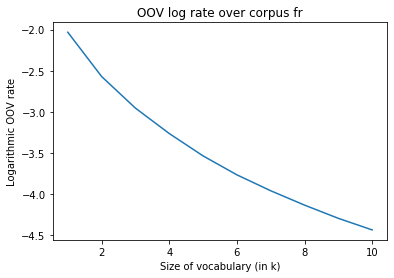

In [0]:
corpora = ['bg', 'de', 'fi', 'fr']
c = 0

for train, test in train_test_corpora:
    oov_rates = []
    oov_rates_log = []
    vocab = Counter(train)
    vocab_10k = [key for key, val in vocab.most_common(10000)]
    vocab_range = []
    for i in range(1,11):
        vocab_ik = vocab_10k[0:(i*1000)]
        oov_count = 0
        for token in test:
            if token not in vocab_ik:
                oov_count +=1
        oov_rates.append(oov_count/len(test))
        oov_rates_log.append(math.log((oov_count/len(test)), 2))
    
    plt.plot(range(1,11), oov_rates)
    plt.ylabel("OOV rate")
    plt.xlabel("Size of vocabulary (in k)")
    plt.title("OOV rate over corpus " + corpora[c])
    plt.show()
    
    plt.plot(range(1,11), oov_rates_log)
    plt.ylabel("Logarithmic OOV rate")
    plt.xlabel("Size of vocabulary (in k)")
    plt.title("OOV log rate over corpus " + corpora[c])
    plt.show()
    
    c += 1
